In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df.to_csv("/content/drive/MyDrive/machine learning/actividades ml/Proyecto 2 – Parte I (Core)/dataset2.csv")

| Columna       | Tipo        | Descripción                                                                                                   |
| ------------- | ----------- | ------------------------------------------------------------------------------------------------------------- |
| `survived`    | int (0 o 1) | Indica si el pasajero sobrevivió (`1`) o no (`0`).                                                            |
| `pclass`      | int (1–3)   | Clase del boleto: `1` = primera clase, `2` = segunda clase, `3` = tercera.                                    |
| `sex`         | str         | Sexo del pasajero: `"male"` o `"female"`.                                                                     |
| `age`         | float       | Edad del pasajero. Puede contener valores faltantes y decimales.                                              |
| `sibsp`       | int         | Número de hermanos/as o esposos/as a bordo.                                                                   |
| `parch`       | int         | Número de padres o hijos a bordo.                                                                             |
| `fare`        | float       | Tarifa pagada por el pasajero.                                                                                |
| `embarked`    | str         | Puerto de embarque: `C` (Cherbourg), `Q` (Queenstown), `S` (Southampton).                                     |
| `class`       | str         | Clase del pasajero en texto (`First`, `Second`, `Third`). Redundante con `pclass`.                            |
| `who`         | str         | Tipo de persona: `"man"`, `"woman"` o `"child"`.                                                              |
| `adult_male`  | bool        | `True` si el pasajero es un hombre adulto.                                                                    |
| `deck`        | str         | Letra de la cubierta del barco (ej: `C`, `D`). Muchos valores faltantes.                                      |
| `embark_town` | str         | Nombre completo del puerto de embarque (`Cherbourg`, `Queenstown`, `Southampton`). Redundante con `embarked`. |
| `alive`       | str         | `"yes"` o `"no"`, si sobrevivió. Redundante con `survived`.                                                   |
| `alone`       | bool        | `True` si el pasajero viajaba solo (`sibsp` y `parch` iguales a `0`).                                         |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Algunas columnas no son necesarias.
df.drop(columns=["alive", "adult_male", "embark_town", "pclass"], inplace=True)

In [5]:
# Manejamos datos faltantes.
age_mean_by_group = df.groupby(["sex", "who", "class"])["age"].transform("mean")
df["age"] = df["age"].fillna(age_mean_by_group)

/tmp/ipython-input-5-1855530022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mean_by_group = df.groupby(["sex", "who", "class"])["age"].transform("mean")


In [6]:
# Manejamos datos faltantes.
embarked_mode = df["embarked"].mode()[0]
df["embarked"] = df["embarked"].fillna(embarked_mode)

In [7]:
# Manejamos datos faltantes.
df.drop(columns=["deck"], inplace=True)

In [8]:
# Convertimos a int.
df["alone"] = df["alone"].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   fare      891 non-null    float64 
 6   embarked  891 non-null    object  
 7   class     891 non-null    category
 8   who       891 non-null    object  
 9   alone     891 non-null    int64   
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.8+ KB


In [11]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
age,891.0,30.0,13.0,0.0,22.0,29.0,36.0,80.0
sibsp,891.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
parch,891.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
fare,891.0,32.0,50.0,0.0,8.0,14.0,31.0,512.0
alone,891.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


Exploración de Datos con Visualizaciones

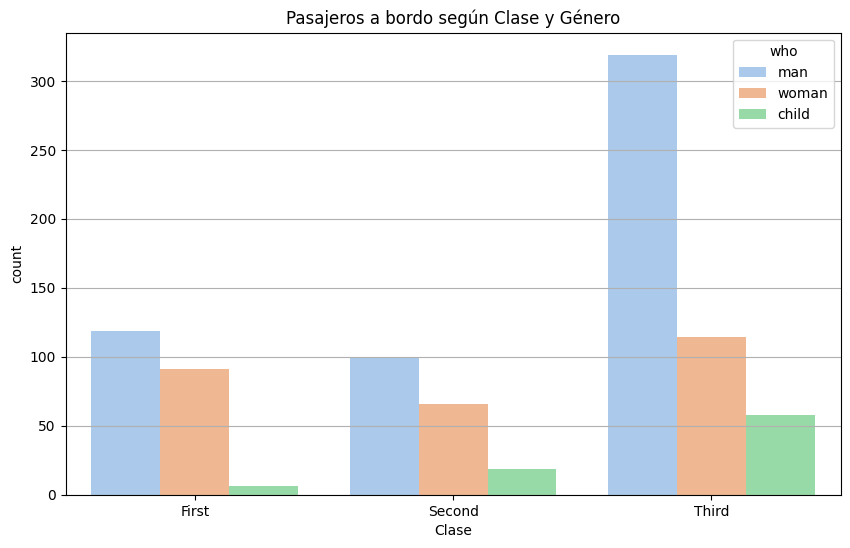

In [42]:
# Gráfico de barras de pasajeros según clase y género

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="class", hue="who", palette="pastel")
plt.title("Pasajeros a bordo según Clase y Género")
plt.xlabel("Clase")
plt.grid(axis="y")
plt.show()


La clase más popular y más diversa fue la Tercera, especialmente dominada por hombres, los cuales predominan en presencia en las 3 clases.
Las clases Primera y Segunda tenían menos pasajeros y una proporción más balanceada entre hombres y mujeres.
La presencia de niños es mucho más notoria en la Tercera Clase.

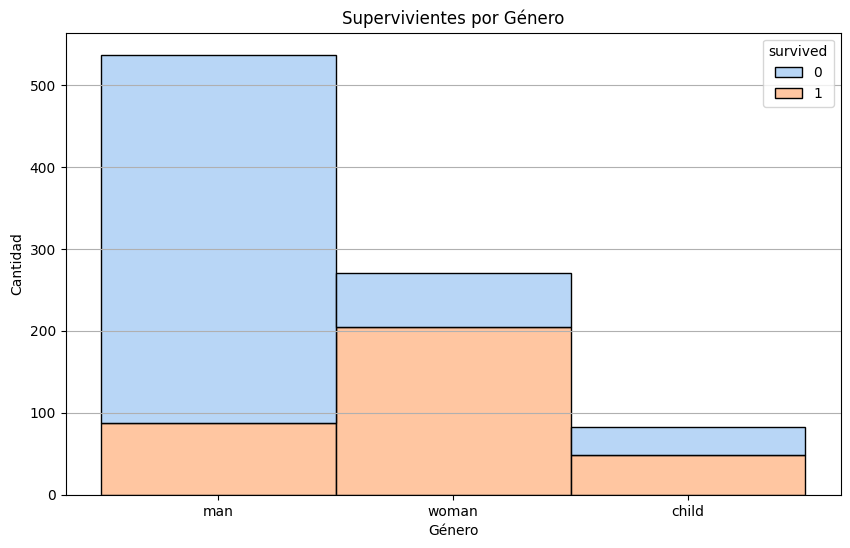

In [41]:
# Histograma de supervivientes segun género

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="who", multiple="stack", hue="survived", palette="pastel")
plt.title("Supervivientes por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.grid(axis="y")
plt.show()

En el histograma podemos observar que hay una diferencia marcada respecto a la cantidad de pasajeros según su sexo y rango etario. Existe aproximadamente el doble de hombres adultos a bordo en comparación con mujeres adultas, y éstas a su vez triplican la cantidad de niños a bordo. En cuanto a supervivencia, el mayor porcentaje de supervivencia corresponde a mujeres adultas, luego niños y el menor procentaje de superviviente corresponde a hombres adultos.
En cuanto a cantidad de supervivientes, la mayor cantidad son mujeres adultas, seguido de hombres adulto y finalmente niños son los que menos sobrevivieron.

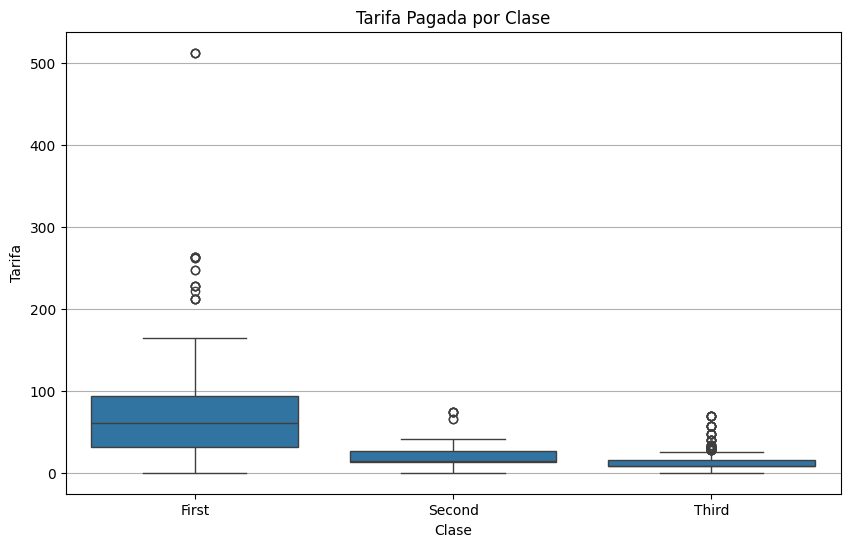

In [33]:
# Boxplot de la tarifa pagada por los pasajeros según clase

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="class", y="fare")
plt.title("Tarifa Pagada por Clase")
plt.xlabel("Clase")
plt.ylabel("Tarifa")
plt.grid(axis="y")
plt.show()


Existe una clara relación entre clase y tarifa pagada: a mayor clase, mayor tarifa.La Primera Clase presenta una distribución más amplia y desigual, lo que sugiere diferentes niveles de lujo dentro de la misma clase.
La Tercera y segunda clase son las más homogéneas con valores similares, aunque en la tercera clase existe más presencia de valores atípicos.

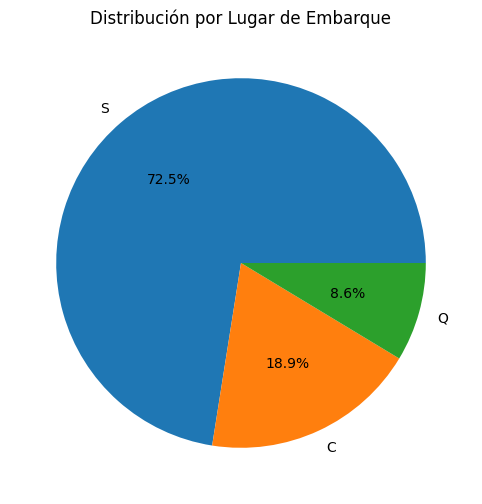

In [38]:
# Distribución por lugar de embarque

plt.figure(figsize=(10, 6))
embarked_counts = df["embarked"].value_counts()
plt.pie(embarked_counts, labels=embarked_counts.index, autopct="%1.1f%%")
plt.title("Distribución por Lugar de Embarque")
plt.show()

La mayor proporción de pasajeron fueron embarcados en la localidad Southampton, con una clara preferencia (72.5%) respecto de las otras dos ciudades en embarque.
Luego le sigue Cherbourg y finalmente Queenstown.